# Aula 05 | Machine Learning, Sci-kit Learning e desafios envolvidos

In [22]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

sns.set()

In [2]:
# importando bases de dados
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

In [28]:
# renomeando coluna
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [3]:
# criação de coluna que armazena quantos mecanismos foram ativados
dados_resultados['n_mec_ativos'] = dados_resultados.drop('id', axis = 1).sum(axis = 1)

In [4]:
# criação de coluna que armazena se foi ativo ou não algum mecanismo
dados_resultados['mec_ativo'] = (dados_resultados['n_mec_ativos'] != 0)

In [29]:
# criando uma nova base de dados com as informações juntas
dados_combinados = pd.merge(dados, dados_resultados[['id', 'n_mec_ativos', 'mec_ativo']], on = 'id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_mec_ativos,mec_ativo
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [6]:
# regressão logística
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['mec_ativo']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, 
                                                        stratify = y, random_state= 376)

modelo_rLogistica = LogisticRegression(max_iter = 1000)
modelo_rLogistica.fit(x_treino, y_treino)
modelo_rLogistica.score(x_teste, y_teste)

0.6267058576527399

In [7]:
# modelo de maior frequência
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6067604450976275

In [35]:
# modelo de árvore de decisão
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['mec_ativo']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, 
                                                        stratify = y, random_state= 376)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6105395758975436

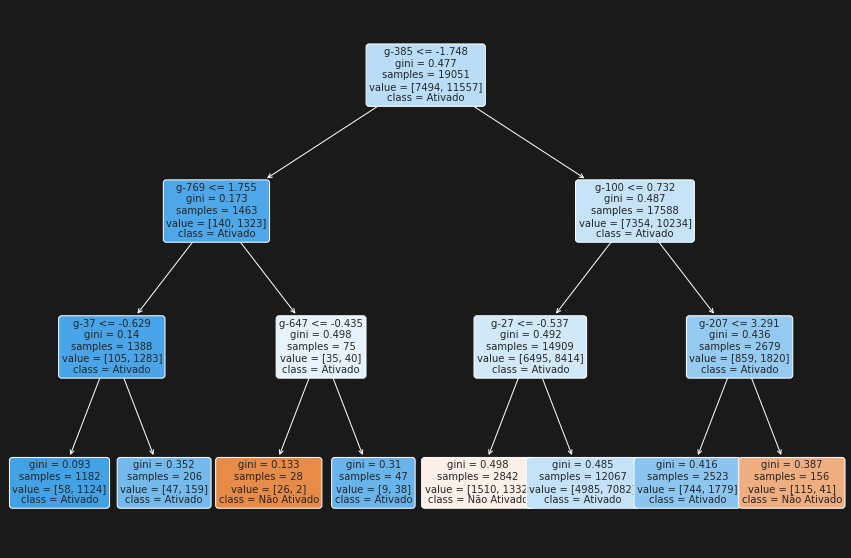

In [36]:
fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

In [12]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['mec_ativo']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

teste=[]
treino=[]
for i in range(1,10):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

In [13]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6105395758975436,
 0.6208272097417594,
 0.6204073063195465,
 0.6187276926306949,
 0.6210371614528658,
 0.6210371614528658,
 0.6168381272307369]

In [14]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6211222508004829,
 0.6360820954280615,
 0.6412261823526324,
 0.6489423127394888,
 0.6605427536612252,
 0.6707259461445594,
 0.689570101307018]

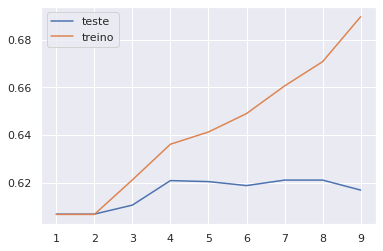

In [21]:
sns.lineplot(x = range(1,10), y = teste, label = 'teste')
sns.lineplot(x = range(1,10), y = treino, label = 'treino')

O gráfico mostra que no começo os valores de treino e teste são muito próximos, mas, conforme aumenta o range, o valor da acurácia para os dados de treino aumentam muito enquanto que para os testes vai caindo (as linhas vão se afastando).

Assim, conforme se aumenta a profundidade da árvore de decisão, a classificação para os dados de treino ficam muito boas (ela consegue captar muito bem as características dos dados), porém o modelo fica tão bom no treino que, ao submeter novos conjuntos de dados (teste), ele não consegue generalizar tão bem e assim, tem-se uma acurácia em queda. Esse problema, de um modelo com performance muito boa nos dados de treino mas performance em queda nos dados de teste, é conhecido na ciência de dados como **overfitting**.

In [23]:
# convertendo colunas para saber se é com droga ou controlado (em binário)
pd.get_dummies(dados_combinados['tratamento'])

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23809,0,1
23810,0,1
23811,1,0
23812,0,1


In [31]:
# modelo de rambom forest (cria várias árvores de decisão)

#retirando algumas colunas para não poluir os treinos e testes
x = dados_combinados.drop(['id', 'composto', 'n_mec_ativos', 'mec_ativo'], axis = 1)

# convertendo colunas string para binário
x = pd.get_dummies(x, columns = ['tratamento', 'tempo', 'dose'])

y = dados_combinados['mec_ativo']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, 
                                                        stratify = y, random_state= 376)

modelo_random_forest = RandomForestClassifier()
modelo_random_forest.fit(x_treino, y_treino)
modelo_random_forest.score(x_teste, y_teste)

0.6848624816292253

In [ ]:
dados_combinados['mec_ativo'].value_counts(normalize = True)

True     0.60666
False    0.39334
Name: mec_ativo, dtype: float64